# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>

---

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
# from datetime import datetime
import datetime as dt
# from collections import Counter
import warnings
from ast import literal_eval
# from sklearn.preprocessing import MinMaxScaler

# Turn off warnings
warnings.filterwarnings("ignore")

## <span style='color:#2B9C15 '> 📕 Basic data exploration </span>

In [2]:
pd.set_option('display.max_columns', None)
anime_df = pd.read_csv('../data/processed_anime.csv')
anime_df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Premiered,Producers,Licensors,Studios,Source,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Mins_per_ep,Start Date,End Date
0,1,Cowboy Bebop,8.78,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Cowboy Bebop,カウボーイビバップ,TV,26.0,Spring 1998,['Bandai Visual'],"['Funimation', 'Bandai Entertainment']",['Sunrise'],Original,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,24.0,1998-04-03,1999-04-24
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,Unknown,"['Sunrise', 'Bandai Visual']",['Sony Pictures Entertainment'],['Bones'],Original,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,115.0,2001-09-01,NaN
2,6,Trigun,8.24,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",Trigun,トライガン,TV,26.0,Spring 1998,['Victor Entertainment'],"['Funimation', 'Geneon Entertainment USA']",['Madhouse'],Manga,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,24.0,1998-04-01,1998-09-30
3,7,Witch Hunter Robin,7.27,"['Action', 'Mystery', 'Police', 'Supernatural'...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,Summer 2002,"['TV Tokyo', 'Bandai Visual', 'Dentsu', 'Victo...","['Funimation', 'Bandai Entertainment']",['Sunrise'],Original,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,25.0,2002-07-02,2002-12-24
4,8,Bouken Ou Beet,6.98,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",Beet the Vandel Buster,冒険王ビィト,TV,52.0,Fall 2004,"['TV Tokyo', 'Dentsu']",[],['Toei Animation'],Manga,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,23.0,2004-09-30,2005-09-29


In [3]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17046 non-null  float64
 8   Premiered      17562 non-null  object 
 9   Producers      17562 non-null  object 
 10  Licensors      17562 non-null  object 
 11  Studios        17562 non-null  object 
 12  Source         17562 non-null  object 
 13  Rating         17562 non-null  object 
 14  Ranked         15800 non-null  float64
 15  Popularity     17562 non-null  int64  
 16  Members        17562 non-null  int64  
 17  Favorites      17562 non-null  int64  
 18  Watchi

1. Sự thay đổi của độ yêu thích các thể loại qua từng năm, từng mùa ?

2. Với từng dạng phát hành của anime thì thể loại nào được yêu thích và có nhiều lượt xem nhất, thời lượng của mỗi tập ?

3. Với mỗi năm thì mùa nào anime được sản xuất nhiều nhất, mùa nào thường có nhiều anime được đánh giá 10 điểm nhất, nhiều views (năm nào => năm huyền thoại trong lòng ng xem anime )
=> Thời điểm vàng để sản xuất anime, thời điểm nở rộ của các anime, thời điểm nào ng dùng sẽ xem đc nội dung hay 

4. Thể loại nào thường sẽ lôi cuốn người xem đến hết bộ (Complete), hay chỉ để người xem có hứng thú nhất thời => ảnh hưởng của thể loại đến hứng thú của ng xem 

5. Rating có ảnh hưởng nhiều đến lượt xem, thể loại ?

6. Studios sản xuất ra nhiều bộ anime được người dùng xem nhiều nhất và đánh giá điểm cao ? (Studios đảm nhiệm phần đồ họa cho anime)

## Câu 1: Sự khác nhau giữa thể loại Anime các nhà sản xuất ưa chuộng và thể loại được người dùng xem nhiều ?

**Nội dung** 
+ Thống kê, phân tích số anime được sản xuất của từng thể loại. Và thống kê lượt xem trung bình của người dùng đối với từng thể loại.

**Mục đích**:
+ Hiểu rõ hơn về thị hiếu của người dùng và xu hướng sản xuất nội dung của các nhà sản xuất trong ngành công nghiệp Anime.
+ Có thể giúp các nhà sản xuất hiểu rõ khẩu vị xem Anime của người dùng và sản xuất theo đúng nhu cầu.
+ Khám phá được thể loại sẽ thu hút người xem và thấy được xếp hạng các thể loại theo lượt xem trung bình.
+ Khám phá được thể loại thường được nhà sản xuất lựa chọn. 

**Phân tích**:
+ Đầu tiên, tính số nhà sản xuất lựa chọn sản xuất thể loại đó.
+ Tiếp theo, tính số lượt xem trung bình của từng thể loại.
+ Cuối cùng là trực quan hóa thành biểu đồ để dễ phân tích.

### 1.1 Tiền xử lý 

Đầu tiên, ta sẽ chuyển dữ liệu của cột `Genres` và `Producers` về dạng list.

Tiếp theo, ta sẽ phân rã cột `Genres` trong tập dữ liệu bởi vì ban đầu mỗi dòng dữ liệu của cột `Genres` là 1 list các thể loại. Sau khi phân rã thì mỗi dòng dữ liệu của cột `Genres` sẽ chỉ chứa 1 thể loại. Ví dụ, ban đầu bộ anime với ID là 0 là anime thuộc 3 thể loại Comedy, Action và Drama thì sau khi phân rã trong tập dữ liệu dòng đó sẽ biến thành 3 dòng với mỗi dùng đều là thông tin của bộ anime đó nhưng khác ở cột `Genres` chỉ chứa 1 thể loại. 

In [4]:
anime_copy_df = anime_df.copy()
anime_copy_df['Genres'] = anime_copy_df['Genres'].apply(eval)
anime_copy_df['Producers'] = anime_copy_df['Producers'].apply(eval)

df_genres_expanded = anime_copy_df.explode('Genres').reset_index()

### 1.2 Phân tích và thống kê 

Những bước sau ta sẽ thực hiện trên tập dữ liệu đã được phân rã cột `Genres`.

Gom nhóm theo thể loại và tính trung bình trên cột `Watching`. Sau đó ta lại phân rã dữ liệu gốc dựa vào cột `Producers` và lưu vào biến `df_producers_expanded`. Tiếp theo, ta tiến hành ghép 2 dữ liệu phân rã dựa vào cột `Name` là tên của anime. Lúc này trong tập dữ liệu sau khi merge, mỗi dòng sẽ chỉ có 1 thể loại và 1 nhà sản xuất. Ta tiếp tục gom nhóm theo `Genres` và đếm số nhà sản xuất. Cuối cùng, ta sẽ tính được số nhà sản xuất ứng với từng thể loại.

In [5]:
df1 = df_genres_expanded.groupby('Genres')['Watching'].mean().sort_values()
df1 = pd.DataFrame(df1)

df_producers_expanded = anime_copy_df.explode('Producers').reset_index()
df2 = df_producers_expanded.merge(df_genres_expanded, on='Name')

df3 = df2.groupby('Genres_y')['Producers_x'].count().reset_index()
df3 = pd.DataFrame(df3)
df3 = df3.rename(columns={'Genres_y': 'Genres', 'Producers_x': 'Producers'})

new_df = df3.merge(df1, on='Genres')
new_df = new_df.sort_values(by='Producers', ascending=False)

### 1.3 Trực quan hóa 

Ta sẽ dùng biểu đồ cột kết hợp với biểu đồ đường với 2 trục y khác nhau để trực quan hóa dữ liệu:
+ Biểu đồ cột sẽ biểu diễn số lượng nhà sản xuất, sử dụng trục y bên trái
+ Biểu đồ đường sẽ thể hiện số lượt xem trung bình của từng thể loại, sử dụng trục y bên phải

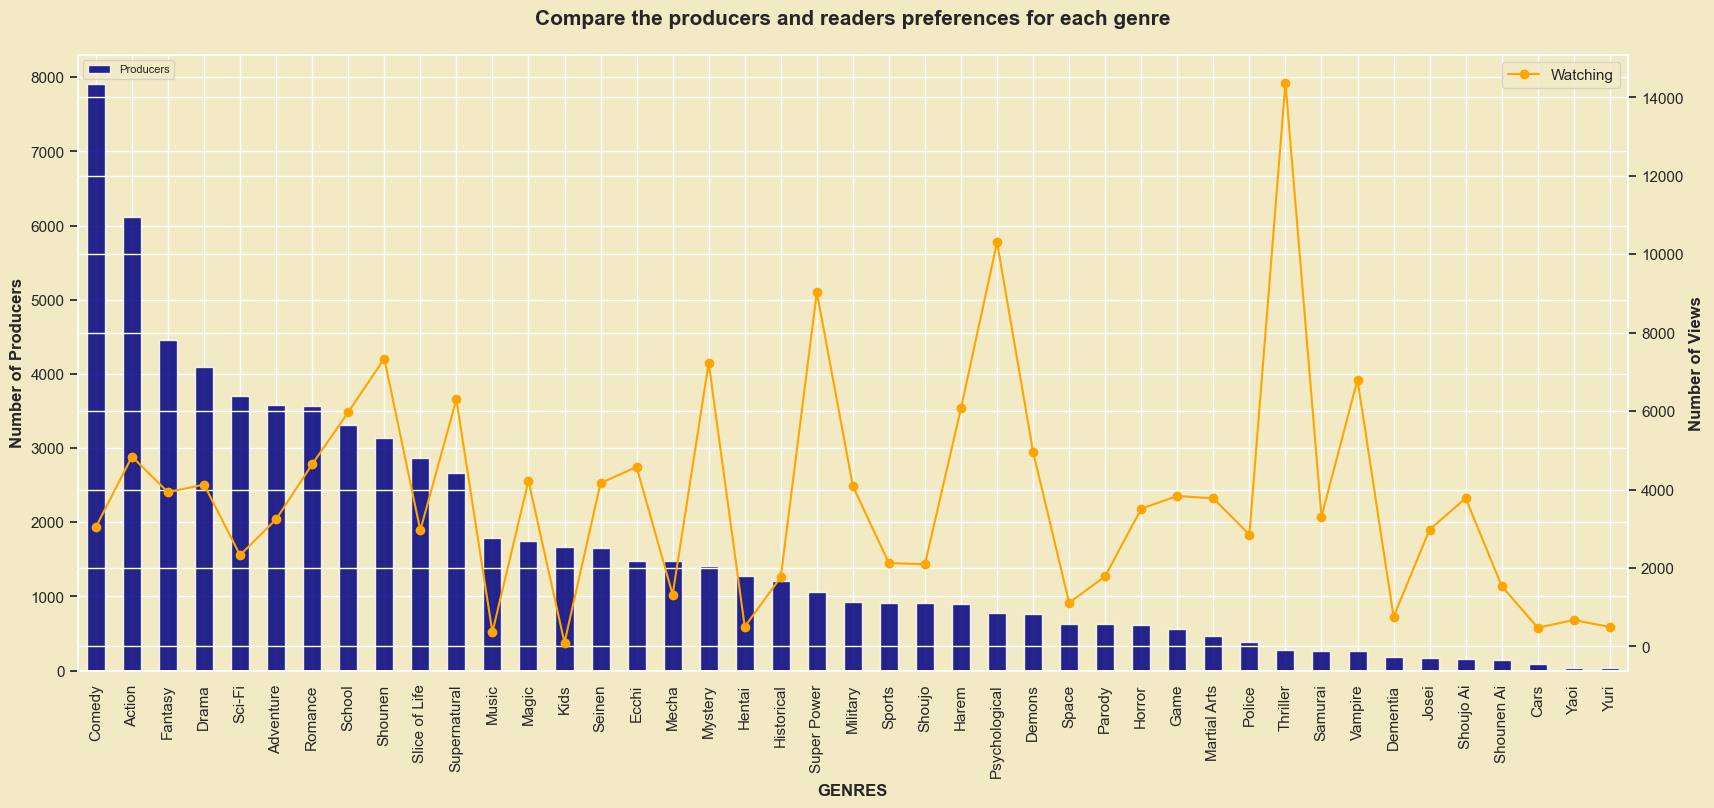

In [6]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, ax = plt.subplots(figsize=(20,8))
new_df.plot(x='Genres',kind='bar', y='Producers', ax=ax, color="navy", alpha=0.85)
ax.set_ylabel('Number of Producers', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=8);
ax.set_xlabel('GENRES', fontsize=12, weight='bold')

ax2 = ax.twinx()
new_df.plot(x='Genres',y='Watching', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Number of Views', fontsize=12, weight='bold')
ax2.set_xlabel('GENRES', fontsize=12, weight='bold')
ax.set_title('Compare the producers and readers preferences for each genre\n',fontsize=15, weight='bold');

sns.set(rc=None)

### 1.4 Nhận xét

+ Thể loại `Thriller` được nhiều người xem nhất thì lại có rất ít nhà sản xuất lựa chọn.
+ Thể loại `Comedy` được nhiều nhà sản xuất ưa chuộng lại có lượt xem không cao đối với người dùng.
+ Những thể loại có lượt xem trung bình cao như `Thriller`, `psychology`, `Super Power` và `Mystery` (đây là top 5 thể loại có lượt xem trung bình cao nhất khảo sát trên người dùng của MAL) thì lại được ít nhà sản xuất lựa chọn để tạo ra các bộ anime.
+ Những thể loại `Comedy`, `Action` và `Fantasy` được nhiều nhà sản xuất ưa chuộng nhưng lại không có lượt xem cao. Có thể đây là 1 lựa chọn an toàn cho các nhà sản xuất hoặc cũng có thể những thể loại này là thể loại thường thức - là thể loại dễ để gắn nên các bộ anime đều có.

## Câu hỏi 2: Thể loại phổ biến nhất, thời lượng mỗi tập và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime ?

Một bộ Anime có thể được phát hành dưới 6 dạng sau:
+ Movie
+ Music
+ ONA
+ OVA
+ Special
+ TV

**Nội dung**: 
+ Thống kê, phân tích sâu vào từng dạng (`Type`) phát hành anime dựa vào thể loại (`Genres`), thời lượng mỗi tập (`Mins_per_ep`) và giới hạn tuổi (`Rating`) của dữ liệu. 

**Mục đích**:
+ Hiểu kỹ về từng dạng phát hành của anime. 
+ Khám phá được một vài thông tin về anime như thời lượng mỗi tập phát sóng của từng thể loại khác nhau như thế nào. Từ đó giúp ta hiểu hơn về đặc điểm từng dạng phát hành anime.
+ Giới hạn độ tuổi của anime liệu có khắc khe không 
+ Biết được thể loại phổ biến của từng dạng phát hành.

**Phân tích**:
+ Đầu tiên, ta sẽ tìm thể loại phổ biến nhất và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime
+ Sau đó ta sẽ tính thời lượng trung bình của từng dạng phát hành anime

### 2.1 Thể loại phổ biến nhất và giới hạn độ tuổi phổ biến nhất của từng dạng phát hành của anime

**Tiền xử lý**:
Phân rã cột `Genres` sau đó gom nhóm theo cột `Type`. Tiếp theo ta sẽ đếm số lần xuất hiện của từng phân loại của `Genres` và `Rating`. Cuối cùng ta sẽ lấy phân loại xuất hiện nhiều nhất.

In [7]:
anime_copy_df = anime_df.copy()
anime_copy_df['Genres'] = anime_copy_df['Genres'].apply(eval)

df_genres_expanded = anime_copy_df.explode('Genres').reset_index()
df1 = df_genres_expanded.groupby('Type')['Genres'].value_counts() #.sort_values(ascending=False)

df1 = df_genres_expanded.groupby(['Type']).apply(lambda x: x['Genres'].value_counts().index[0])
df2 = df_genres_expanded.groupby(['Type']).apply(lambda x: x['Rating'].value_counts().index[0])

res_df = pd.DataFrame([df1, df2], index=['Thể loại phổ biến nhất', 'Giới hạn độ tuổi phổ biến nhất']).T #columns=['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV', 'Unknown']

**Phân tích**:
Kết quả ta sẽ có 1 bảng với mỗi dòng là tên dạng phát hành anime, thể loại phổ biến nhất của dạng đó và giới hạn độ tuổi phổ biến nhất của dạng đó

In [8]:
res_df

,Thể loại phổ biến nhất,Giới hạn độ tuổi phổ biến nhất
Type,,
Movie,Comedy,PG-13 - Teens 13 or older
Music,Music,G - All Ages
ONA,Comedy,PG-13 - Teens 13 or older
OVA,Hentai,PG-13 - Teens 13 or older
Special,Comedy,PG-13 - Teens 13 or older
TV,Comedy,PG-13 - Teens 13 or older
Unknown,Sci-Fi,Unknown


### 2.2 Với từng dạng anime thì thời lượng trung bình của 1 tập và lượt yêu thích như thế nào ?

**Tiền xử lý và phân tích**:
Gom nhóm dữ liệu theo cột `Type` và tính trung bình dựa trên cột `Mins_per_ep` ta được thời lượng trung bình mỗi tập và tính trung bình trên cột `Favorite` ta được lượt yêu thích của từng dạng anime.

In [9]:
df1 = anime_copy_df.groupby('Type')['Favorites'].mean().sort_values()
df1 = pd.DataFrame(df1)

df2 = anime_copy_df.groupby('Type')['Mins_per_ep'].mean().sort_values()
df2 = pd.DataFrame(df2)

new_df = df2.merge(df1, on='Type').reset_index()

new_df = new_df.sort_values(by='Mins_per_ep', ascending=False)

**Trực quan hóa**:
Ta sẽ dùng biểu đồ kết hợp giữa cột và đường với 2 trục y khác nhau, trong đó:
+ Biểu đồ cột thể hiện thời lượng mỗi tâp, tính theo phút. Sử dụng trục y bên trái
+ Biểu đồ đường thể hiện lượt yêu thích trung bình. Sử dụng trục y bên phải

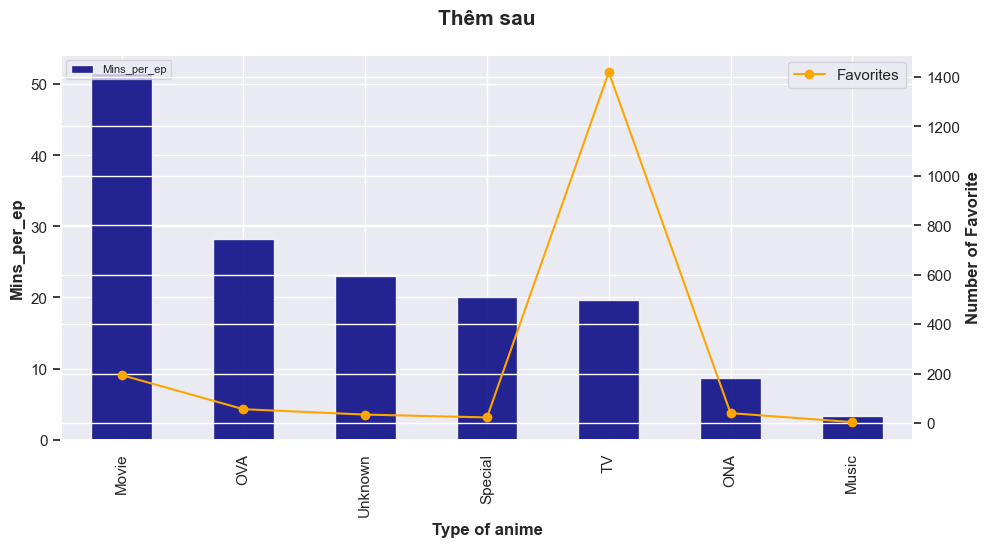

In [10]:
fig, ax = plt.subplots(figsize=(11,5))
new_df.plot(x='Type',kind='bar', y='Mins_per_ep', ax=ax, color="navy", alpha=0.85)
ax.set_ylabel('Mins_per_ep', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=8);
ax.set_xlabel('Type of anime', fontsize=12, weight='bold')

ax2 = ax.twinx()
new_df.plot(x='Type',y='Favorites', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Number of Favorite', fontsize=12, weight='bold')
ax2.set_xlabel('Type of anime', fontsize=12, weight='bold')
ax.set_title('Thêm sau\n',fontsize=15, weight='bold');

**Nhận xét**:
+ Thời lượng mỗi tập của Movie anime là cao nhất (hơn 50 phút cho 1 tập) và thấp nhất là dạng Music anime chỉ cỡ 3-5 phút cho 2 tập.
+ Dạng được yêu thích nhất là TV thường có thời lượng mỗi tập rơi vào khoảng 20 phút.

## Câu hỏi 3: Số lượng anime được sản xuất qua từng năm và những năm nào có nhiều bộ anime được đánh giá cao nhất

**Nội dung**:
+ Xem xét số lượng anime được phát hành qua mỗi năm thay đổi như thế nào
+ Đánh giá của người dùng đối với anime

In [11]:
df_copy = anime_df.copy()
df_copy['Start Date'] = pd.to_datetime(df_copy['Start Date'], errors='coerce')

df_copy['Year'] = df_copy['Start Date'].dt.year.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10

anime_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
anime_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')

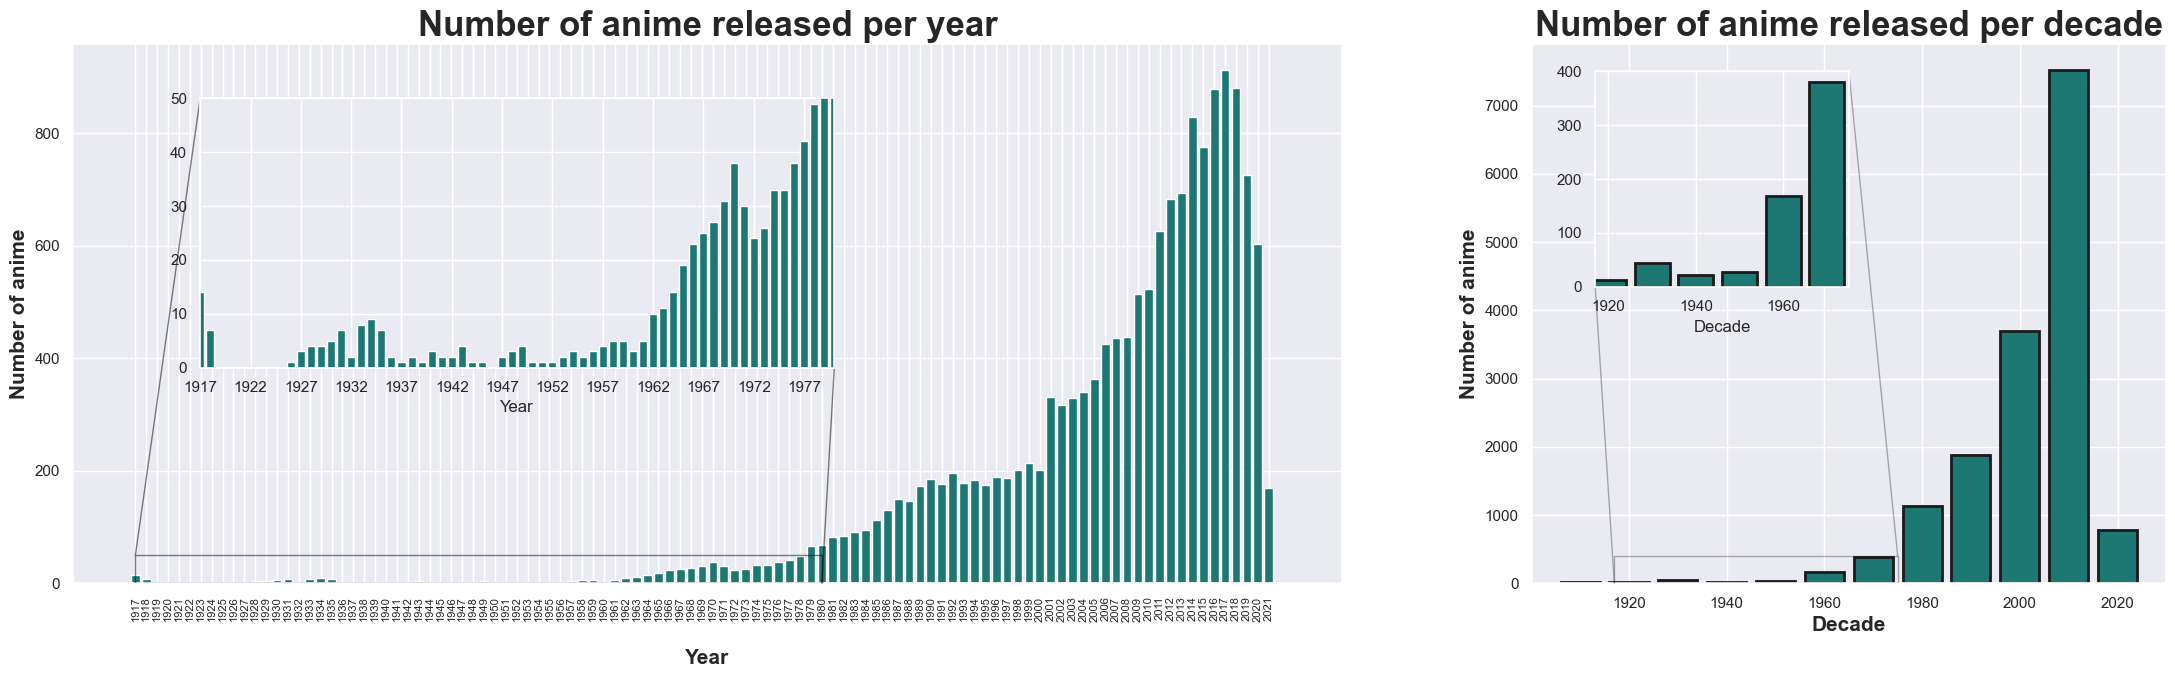

In [12]:
sns.set(rc=None)
fig, axes = plt.subplots(1, 2, figsize=(27, 7), gridspec_kw={'width_ratios': [2, 1]})
# sns.set_style('darkgrid')
# sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
axes[0].bar(anime_per_year['Year'], anime_per_year['Count'], color="#1d7874")
axes[0].set_title('Number of anime released per year', fontsize=25, weight='bold')
axes[0].set_xlabel('\nYear', fontsize=15, weight='bold')
axes[0].set_ylabel('Number of anime', fontsize=15, weight='bold')
axes[0].set_xticks(range(1917, 2022, 1))
axes[0].set_xticklabels(range(1917, 2022, 1),rotation=90, fontsize=8)

axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(anime_per_year['Year'], anime_per_year['Count'], color="#1d7874", width=0.8)
axin.set_xlim(1917, 1980)
axin.set_ylim(0, 50)
axin.set_xticks(range(1917, 1980, 5))
axin.set_xlabel('Year')
axin.set_ylabel('')

axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(anime_per_decade['Decade'], anime_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axes[1].set_title('Number of anime released per decade', fontsize=25, weight='bold')
axes[1].set_xlabel('Decade', fontsize=15, weight='bold')
axes[1].set_ylabel('Number of anime', fontsize=15, weight='bold')

axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(anime_per_decade['Decade'], anime_per_decade['Count'], color="#1d7874", width=8, linewidth=2, edgecolor='k')
axin.set_xlim(1917, 1975)
axin.set_ylim(0, 400)
axin.set_xlabel('Decade')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()

In [13]:
df_copy = anime_df.copy()
df_copy['Start Date'] = pd.to_datetime(df_copy['Start Date'], errors='coerce')

df_copy['Year'] = df_copy['Start Date'].dt.year.astype('Int64')
df1 = df_copy.groupby('Year')['Score-10'].mean().reset_index(name='Num_10')
df1.sort_values(by='Num_10', ascending=False).head(10)

,Year,Num_10
81,2006,4977.828235
86,2011,4678.878400
83,2008,4416.850917
90,2015,4347.018135
91,2016,4333.839041
89,2014,4105.507246
87,2012,3992.575000
84,2009,3952.758285
88,2013,3731.816739
94,2019,3584.411095


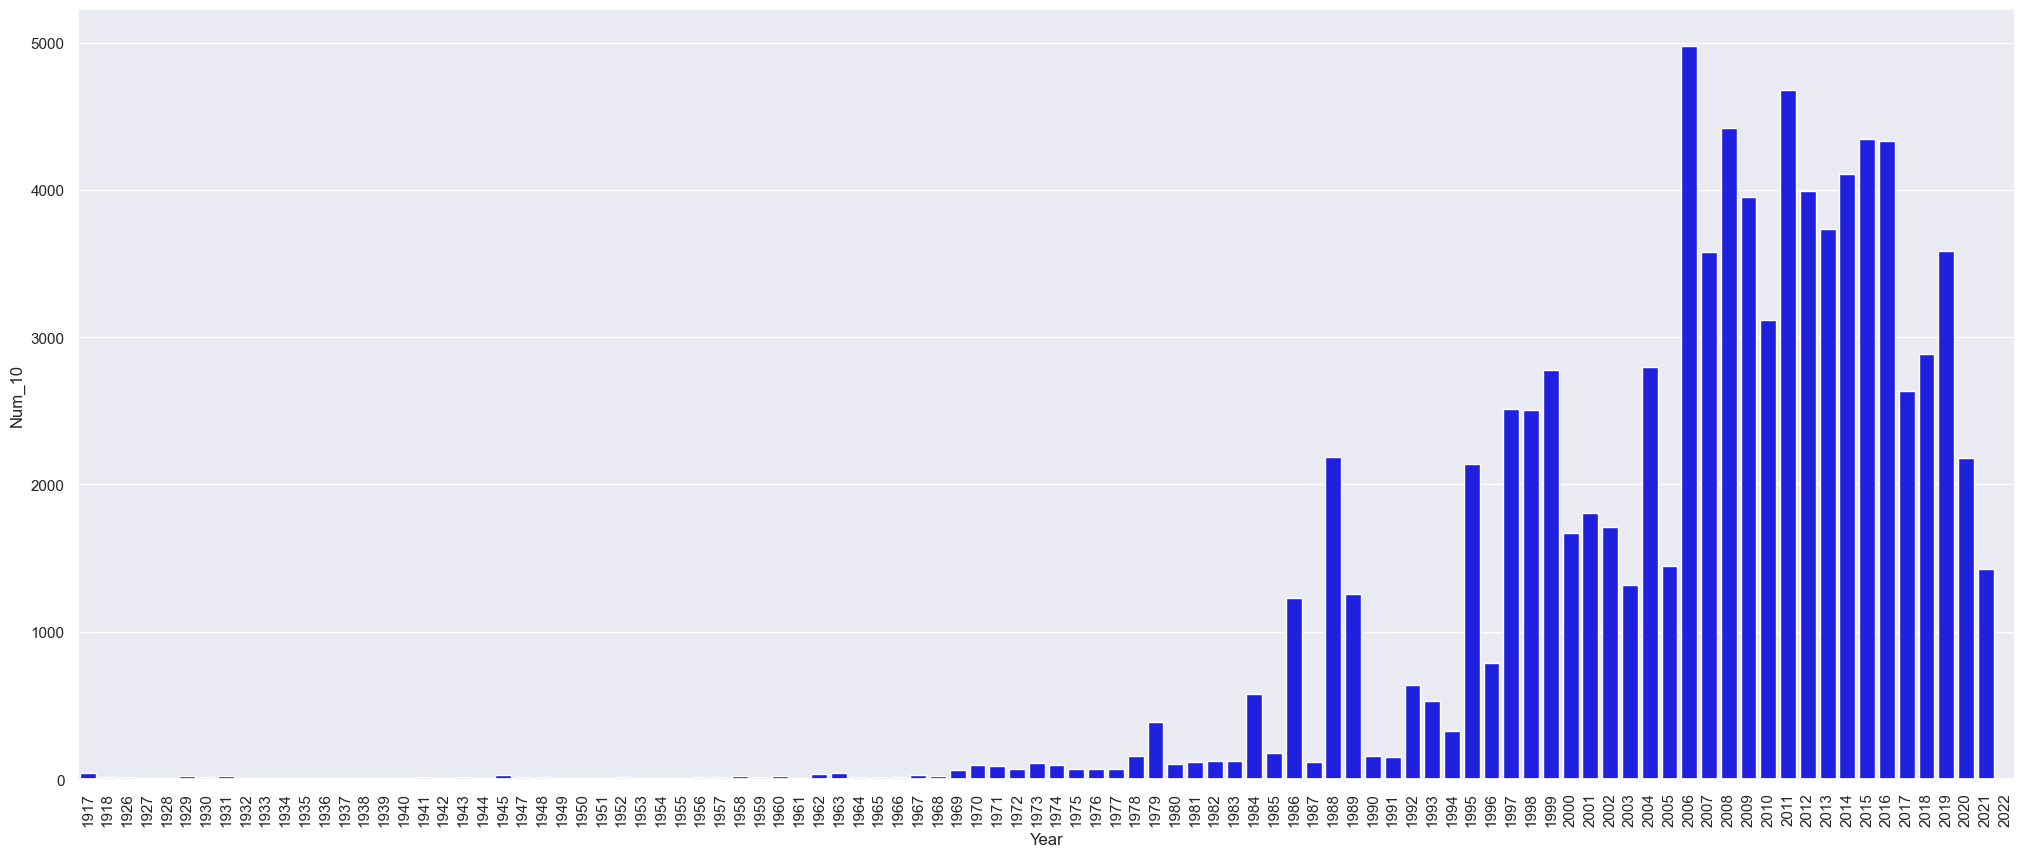

In [14]:
plt.figure(figsize=(25,10))
p = sns.barplot(x=df1['Year'], y=df1['Num_10'], color='blue')
p.set_xticklabels(p.get_xticklabels(),rotation=90);
